In [243]:
!pip install graphviz

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [335]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linreg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import * 
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz 

In [336]:
%matplotlib inline

In [337]:
df = pd.read_csv('adult.csv')

In [338]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [339]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

df = df[df['occupation']!='?']

df = df[df['native.country']!='?']

df = df[df['workclass']!='?']

df['race'] = df['race'].map({'White':1, 'Black':0, 'Asian-Pac-Islander':0, 'Other':0, 'Amer-Indian-Eskimo':0})


In [340]:
df['relationship'] = df['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0,
       'Husband':1, 'Wife':1})

df['marital.status'] = df['marital.status'].map({'Widowed':0, 'Divorced':0, 'Separated':0, 'Never-married':0, 'Married-civ-spouse':1, 'Married-spouse-absent':1, 'Married-AF-spouse':1})

In [217]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,0,Exec-managerial,0,1,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,0,Machine-op-inspct,0,1,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,0,Prof-specialty,0,1,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,0,Other-service,0,1,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,0,Adm-clerical,0,1,Male,0,3770,40,United-States,0


In [ ]:
sns.

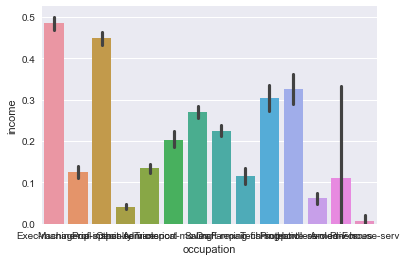

In [341]:
sns.set()

sns.barplot(x='occupation', y='income', data=df)

In [168]:
#grouping relationships did not increase 
#df['relationship'].unique()

#df['net.capital'] = df['capital.gain'] - df['capital.loss']

#grouping workclass doesn't help 
#df['workclass'] = df['workclass'].map({'Private':1, 'State-gov':0, 'Federal-gov':0, 'Self-emp-not-inc':0, 'Self-emp-inc':0, 'Local-gov':0, 'Without-pay':0})

#df['college'] = df['education'].map({'HS-grad':0, '7th-8th':0, 'Some-college':1, '10th':0, 'Doctorate':1, 'Prof-school':1, 'Bachelors':1, 'Masters':1, '11th':0, 'Assoc-voc':1,
#       '1st-4th':0, '5th-6th':0, 'Assoc-acdm':1, '12th':0, '9th':0, 'Preschool':0})


#df['native.country'] = df['native.country'].replace(['Mexico', 'Greece', 'Vietnam', 'China',
#       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
#       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
#       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
#       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
#       'Haiti', 'Hungary', 'Columbia', 'Guatemala', 'El-Salvador',
#       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos',
#       'Thailand', 'Outlying-US(Guam-USVI-etc)', 'Scotland'], 'ex-US')
#df['native.country'] = df['native.country'].replace(['United-States'], 'US')
#df['native.country'] = df['native.country'].map({'ex-US':0, 'US':1})


In [226]:
df['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [342]:
#categorical variables 
X = pd.get_dummies(df[['workclass','marital.status', 'relationship', 'race', 'sex', 'occupation', 'native.country']], drop_first=True)

#numerical variables
X['education.num'] = df['education.num']
X['hours.per.week'] = df['hours.per.week']
X['capital.loss'] = df['capital.loss']
X['capital.gain'] = df['capital.gain']
X['age'] = df['age']

#dependent
y = df['income']

In [343]:
#use logistic regression since we're predicting an outcome with two possible options 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train)

0.8500145053669858

In [344]:
confusion_matrix(y_pred, y_test)

array([[4182,  609],
       [ 351,  891]])

Text(0.5,77.02,'Predicted label')

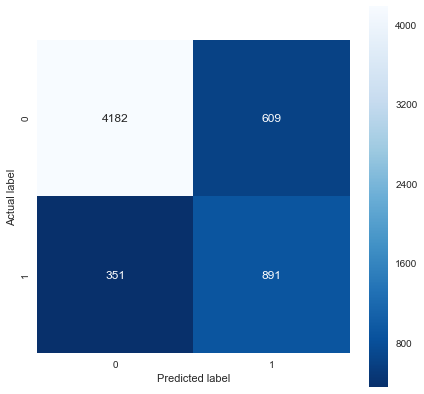

In [345]:
sns.set()

fig, ax = plt.subplots(figsize=(7,7))

sns.heatmap(confusion_matrix(y_pred, y_test), fmt="", annot=True, square=True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [346]:
#calculating the accuracy of the test data set
(4182+891)/(4182+891+351+609) #=0.8408751864743909

0.8408751864743909

In [ ]:
#---------------------------------------------------------------------------------------------------------

In [ ]:
#USING DECISION TREES 

In [347]:
df = pd.read_csv('adult.csv')

In [348]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df = df[df['occupation']!='?']
df = df[df['native.country']!='?']
df = df[df['workclass']!='?']
#df['race'] = df['race'].map({'White':1, 'Black':0, 'Asian-Pac-Islander':0, 'Other':0, 'Amer-Indian-Eskimo':0})
#df['relationship'] = df['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0,
#       'Husband':1, 'Wife':1})
#df['marital.status'] = df['marital.status'].map({'Widowed':0, 'Divorced':0, 'Separated':0, 'Never-married':0, 'Married-civ-spouse':1, 'Married-spouse-absent':1, 'Married-AF-spouse':1})

In [350]:
#categorical variables 
X = pd.get_dummies(df[['workclass','marital.status', 'relationship', 'race', 'sex', 'occupation', 'native.country']])

#numerical variables
X['education.num'] = df['education.num']
X['hours.per.week'] = df['hours.per.week']
X['capital.loss'] = df['capital.loss']
X['capital.gain'] = df['capital.gain']
X['age'] = df['age']

#dependent
y = df['income']

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train) #=0.9763769737660077


0.9780347299929545

In [353]:
model = model.fit(X_train, y_train)

# export the trained decision tree
dot_data = tree.export_graphviz(model, out_file=None,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph


KeyboardInterrupt: 

In [354]:
c = confusion_matrix(y_test, y_pred)

Text(0.5,77.02,'Predicted label')

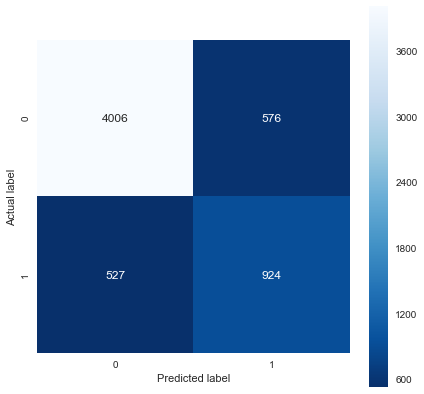

In [355]:
fig, ax = plt.subplots(figsize=(7,7))

sns.heatmap(confusion_matrix(y_pred, y_test), fmt="", annot=True, square=True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [357]:
#calculating accuracy score
(c[(0,0)]+c[(1,1)])/(c[(0,0)]+c[(0,1)]+c[(1,0)]+c[(1,1)]) # ~81-82% 

0.8171722194596387

(0, 0.4)

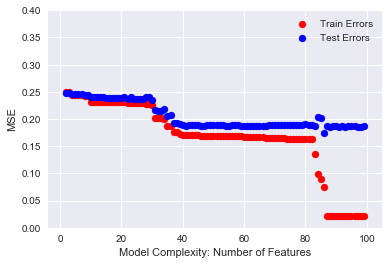

In [385]:
#iterate over the range (for i in range (2,50)), calculate train and test error. at some point the test error is gonna explode 

train_errors = []
test_errors = []
num_feats = []
for i in range(2,100):
    #Subset to select features
    cols_to_use = X.columns[:i]
    X_train_temp = X_train[cols_to_use]
    #Fit a model
    model = tree.DecisionTreeClassifier()
    model.fit(X_train_temp, y_train)
    #Calculate Train errrors
    y_hat_train = model.predict(X_train_temp)
    train_errors.append(mse(y_train, y_hat_train))
    #Calculate Test errors
    X_test_temp = X_test[cols_to_use]
    y_hat_test = model.predict(X_test_temp)
    test_errors.append(mse(y_test, y_hat_test))
    num_feats.append(i)
plt.scatter(num_feats, train_errors, c='red', label='Train Errors')
plt.scatter(num_feats, test_errors, c='blue', label='Test Errors')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Model Complexity: Number of Features')
plt.ylabel('MSE')
plt.ylim(0, 0.4)




In [ ]:
#read up on random forests

In [398]:
#using max features 

df = pd.read_csv('adult.csv')

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df = df[df['occupation']!='?']
df = df[df['native.country']!='?']
df = df[df['workclass']!='?']


#categorical variables 
X = pd.get_dummies(df[['workclass','marital.status', 'relationship', 'race', 'sex', 'occupation', 'native.country']])

#numerical variables
X['education.num'] = df['education.num']
X['hours.per.week'] = df['hours.per.week']
X['capital.loss'] = df['capital.loss']
X['capital.gain'] = df['capital.gain']
X['age'] = df['age']

#dependent
y = df['income']

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train) #=0.9763769737660077


0.8660118529570227

Text(0.5,77.02,'Predicted label')

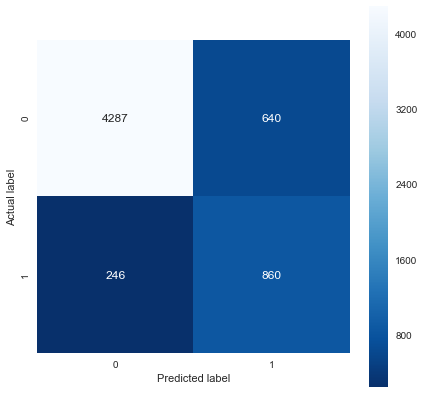

In [400]:
c = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7,7))

sns.heatmap(confusion_matrix(y_pred, y_test), fmt="", annot=True, square=True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [401]:
#trying to beat .81 

(c[(0,0)]+c[(1,1)])/(c[(0,0)]+c[(0,1)]+c[(1,0)]+c[(1,1)]) # ~81-82% 

0.8531410575169899

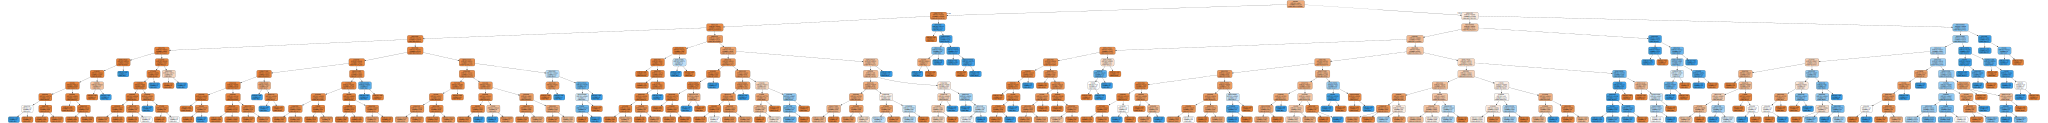

In [402]:
model = model.fit(X_train, y_train)

# export the trained decision tree
dot_data = tree.export_graphviz(model, out_file=None,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph
